In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta = r"G:\Otros ordenadores\PC Joel\Joel\CUNEF\1 CUATRI\Aprendizaje Automático\Clase\EDA\Base.csv"

df = pd.read_csv(ruta)

df.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,AD,1204,...,0,200.0,0,INTERNET,6.987316,linux,1,1,0,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,AB,1998,...,0,200.0,0,INTERNET,28.199923,x11,1,1,0,0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,AB,1548,...,1,200.0,0,INTERNET,11.234264,other,1,1,0,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,AB,1781,...,0,200.0,0,INTERNET,5.329387,other,1,1,0,0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,AD,3113,...,0,1500.0,0,INTERNET,4.103970,other,1,1,0,0


In [3]:
df.shape

(1000000, 32)

In [4]:
df.columns


Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [6]:
df.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [5]:
df.isnull().sum()[df.isnull().sum() > 0]

# No hay columnas con nulos

Series([], dtype: int64)

In [6]:
for col in df.columns:
    print(df[col].value_counts())

fraud_bool
0    988971
1     11029
Name: count, dtype: int64
income
0.9    221419
0.1    157449
0.8    146650
0.6    111973
0.7    105109
0.4     81364
0.2     69345
0.5     55858
0.3     50833
Name: count, dtype: int64
name_email_similarity
0.389347    2
0.533055    2
0.670345    2
0.012690    2
0.621812    2
           ..
0.858563    1
0.794049    1
0.813372    1
0.895561    1
0.993391    1
Name: count, Length: 998861, dtype: int64
prev_address_months_count
-1      712920
 11      11475
 28      10275
 29      10150
 10      10082
         ...  
 374         1
 5           1
 375         1
 383         1
 381         1
Name: count, Length: 374, dtype: int64
current_address_months_count
6      16376
7      16270
8      16089
5      15896
9      15688
       ...  
413        1
419        1
403        1
424        1
428        1
Name: count, Length: 423, dtype: int64
customer_age
30    311433
20    245855
40    238712
50    140353
60     34770
10     20987
70      6517
80      1297
90  

<Axes: xlabel='customer_age', ylabel='count'>

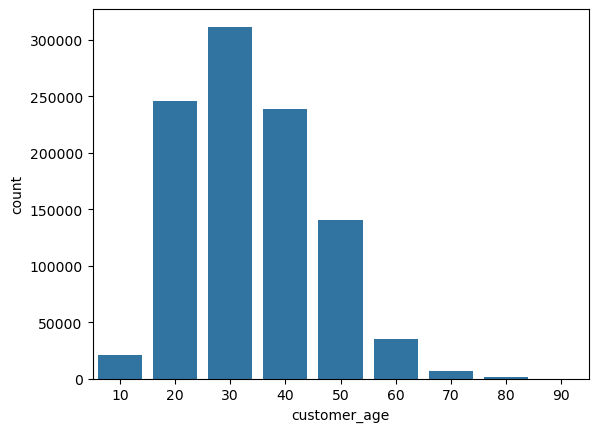

In [16]:
edades = df["customer_age"].value_counts().sort_index().reset_index()

sns.barplot(data=edades, x=edades["customer_age"], y=edades["count"])

In [25]:
correlaciones = df.corr(numeric_only=True)

<Axes: >

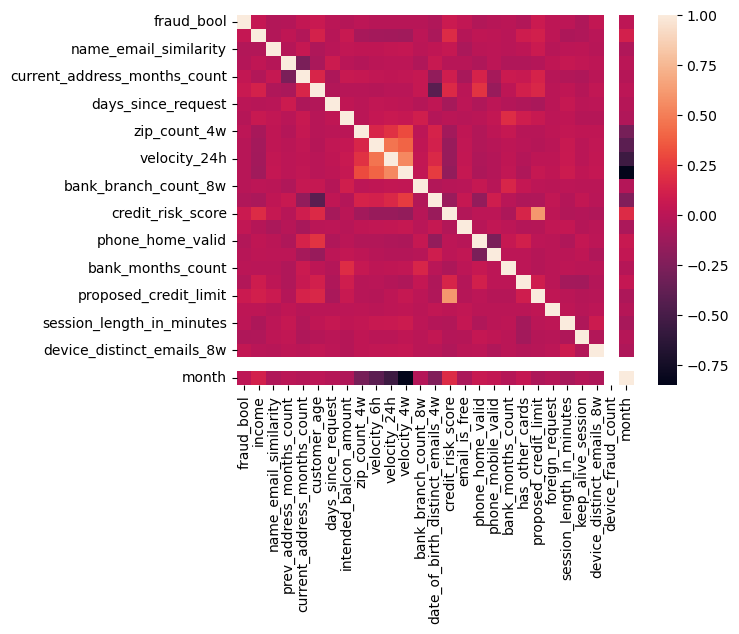

In [ ]:
sns.heatmap(data=correlaciones)

<Axes: ylabel='session_length_in_minutes'>

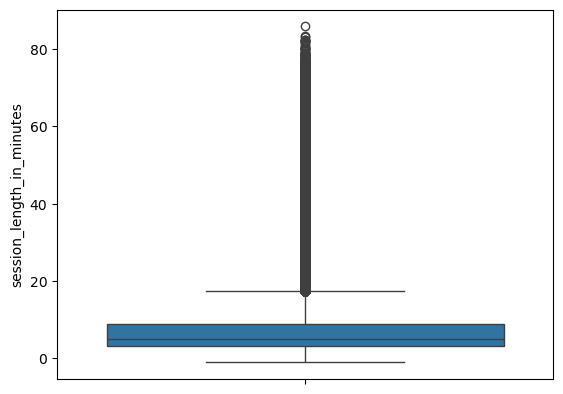

In [30]:
sns.boxplot(df["session_length_in_minutes"])

<Axes: xlabel='customer_age', ylabel='income'>

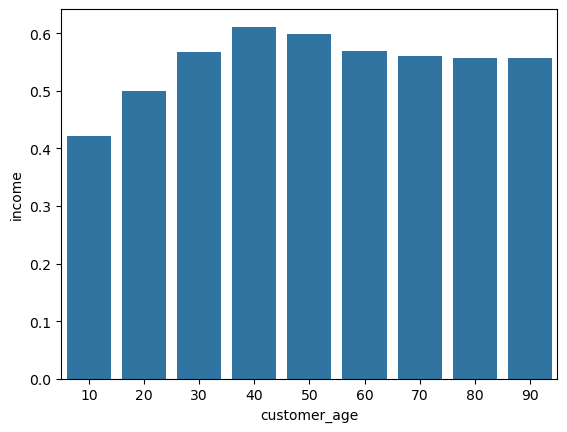

In [35]:
edad_income_medio = df.groupby("customer_age")["income"].mean().reset_index()

sns.barplot(data=edad_income_medio, x=edad_income_medio["customer_age"], y=edad_income_medio["income"])